In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [10]:
train_data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_data = pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [11]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [13]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [16]:
y_train = to_categorical(y_train, 25)
y_val = to_categorical(y_val, 25)
y_test = to_categorical(y_test, 25)

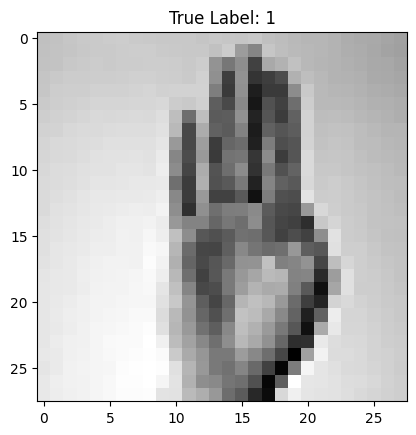

In [17]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {np.argmax(y_train[0])}")
plt.show()

In [31]:
model = models.Sequential([
    layers.InputLayer(shape=(28, 28, 1)),  
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Reshape((1, -1)),
    
    layers.LSTM(128, return_sequences=False, activation='tanh'),
    
    layers.Dense(25, activation='softmax')
])

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 1, 6272)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           3,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,355,033 (12.80 MB)

 Trainable params: 3,355,033 (12.80 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [35]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop])


Epoch 1/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4713 - loss: 1.8544 - val_accuracy: 0.9891 - val_loss: 0.1256
Epoch 2/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9965 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 0.0156
Epoch 3/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0110 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 8.6067e-04 - val_accuracy: 1.0000 - val_loss: 7.1006e-04
Epoch 8/30
348/348 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 5.7466e-04 - val_

In [36]:
model.save('sign_language_model_v2.h5')

In [37]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
cm = confusion_matrix(y_true, y_pred_classes)

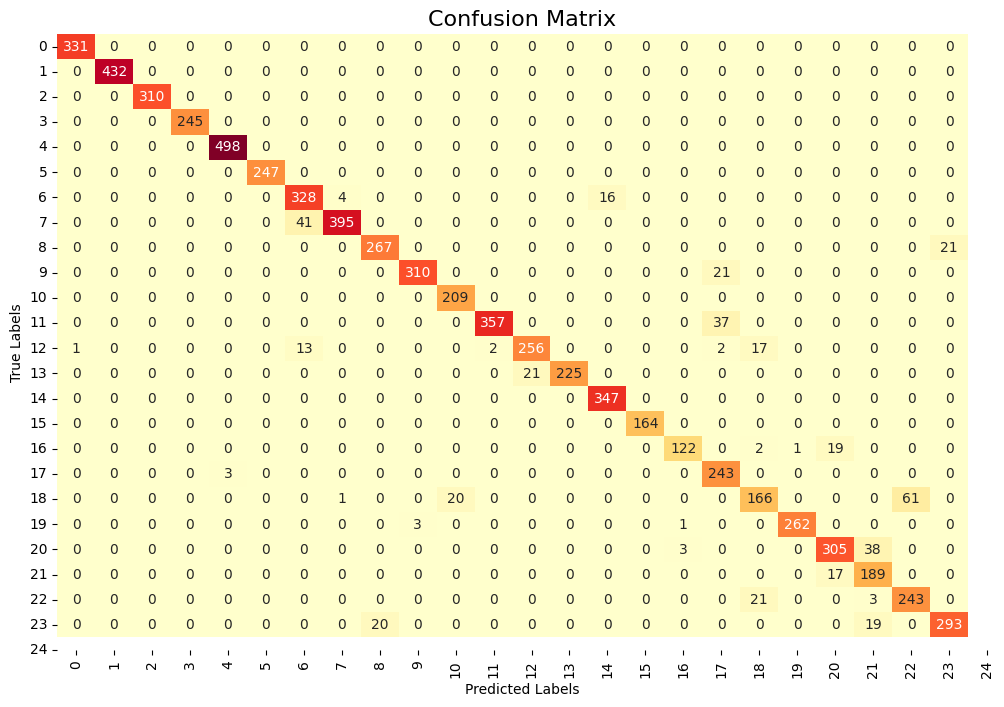

In [39]:
labels = [str(i) for i in range(25)]

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", xticklabels=labels, yticklabels=labels, cbar=False)

plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

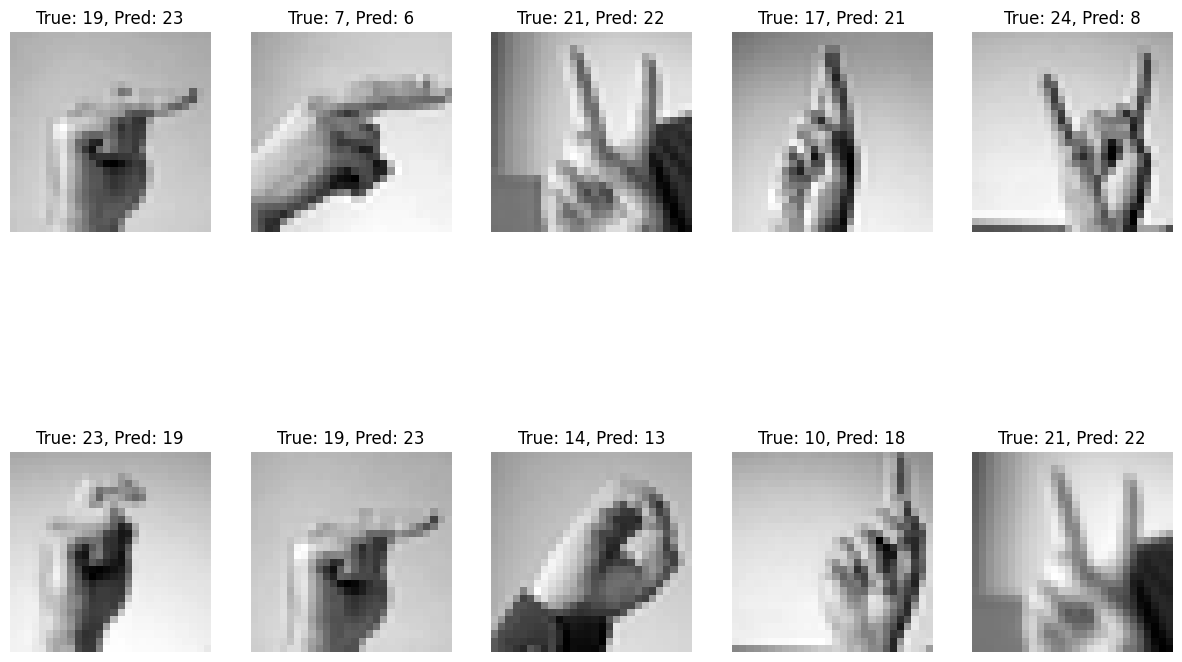

In [40]:
incorrect_predictions = np.where(y_pred_classes != y_true)[0]
num_images = 10

plt.figure(figsize=(15, 10))
for i in range(num_images):
    idx = incorrect_predictions[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()